In [153]:
import json
import math
import random
import time
from math import *

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles
from tabulate import tabulate

from kdtreen import *
from utils import *

In [154]:
no_points = 100
no_centres = 5

In [155]:
X, Y = make_blobs(n_samples=no_points, centers=no_centres)
points = list(set([(x, y) for x, y in X]))
# points = list(set([(round(x, 1), round(y, 1)) for x, y in X]))
print(len(points))

100


# kmeans 1st

In [156]:
k_clusters = math.ceil(math.sqrt(len(points)))

kmeans = KMeans(n_clusters=k_clusters)
kmeans.fit(points)
y_k = kmeans.predict(points)

# Initialize a list for each cluster
clusters = [[] for _ in range(k_clusters)]

# Assign each point to its cluster
for point, cluster_index in zip(points, y_k):
    clusters[cluster_index].append(point)

# Now `clusters` is a list of lists, where each inner list contains the points in that cluster
print(clusters)



[[(2.617483637599026, 6.119252012350372), (2.044251847111257, 6.629518327759016), (3.383706870705789, 6.3541172210309265), (2.933856067283957, 6.651081359928177), (2.397122255356439, 6.610711512827137), (1.8877275542451537, 8.36892097111308), (2.387035933251471, 5.9531938129192055), (2.2345005889568537, 7.000679262241913), (1.4234587001726426, 6.879734660965476), (3.0363202825957676, 8.05632952616762), (1.7959671088376528, 7.759778619010543), (1.2404466451120821, 6.958335852692212), (4.285857351250192, 8.673983441132174), (2.0657420963256174, 6.432812186094138), (2.730955194096831, 5.841384964701037), (3.4335273302323657, 6.786217753784202), (2.2721350436195418, 9.187735266409495), (2.6040289910213628, 8.111839629443509), (2.1748250559507802, 7.482578217179709), (2.878635784576989, 7.269031271400179)], [(5.354878836297275, -8.477470469624867), (4.98172392059239, -7.236848911977998), (4.758588301601329, -7.456249880140782), (3.3784159757944385, -7.565857887559982), (5.164954417581045, -

In [157]:
centroids_k = kmeans.cluster_centers_
centroids_k = [tuple(x) for x in centroids_k.tolist()]

# Convert centroids to a list for easier handling/display

In [158]:
import math


def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def create_distance_matrix(points):
    n = len(points)
    distance_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            distance = calculate_distance(points[i], points[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix


def primMST(graph):
    num_vertices = len(graph)
    key = [float("inf")] * num_vertices
    parent = [-1] * num_vertices
    mstSet = [False] * num_vertices
    key[0] = 0
    for cout in range(num_vertices):
        u = minKey(key, mstSet)
        mstSet[u] = True
        for v in range(num_vertices):
            if 0 < graph[u][v] < key[v] and not mstSet[v]:
                key[v] = graph[u][v]
                parent[v] = u
    return parent


def minKey(key, mstSet):
    min_val = float("inf")
    min_index = -1
    for v in range(len(key)):
        if key[v] < min_val and not mstSet[v]:
            min_val, min_index = key[v], v
    return min_index


def get_MST_edges_with_coordinates(points):
    distance_matrix = create_distance_matrix(points)
    mst_parent = primMST(distance_matrix)
    edges = []
    for i in range(1, len(points)):
        if mst_parent[i] != -1:  # Ensure there's a parent
            edge = (points[mst_parent[i]], points[i])
            edges.append(edge)
    return edges


Making mst of all the clusters.

In [159]:
clusters_mst_edges = []  # To store the MST edges of each cluster

for cluster in clusters:
    if len(cluster) > 1:  # Ensure there are at least two points to form an edge
        mst_edges = get_MST_edges_with_coordinates(cluster)
        clusters_mst_edges.append(mst_edges)
    else:
        clusters_mst_edges.append([])  # No edges in a cluster with a single point

# Print MST edges for each cluster
for i, mst_edges in enumerate(clusters_mst_edges):
    print(f"Cluster {i} MST Edges:")
    for edge in mst_edges:
        print(edge)

Cluster 0 MST Edges:
((2.397122255356439, 6.610711512827137), (2.044251847111257, 6.629518327759016))
((3.4335273302323657, 6.786217753784202), (3.383706870705789, 6.3541172210309265))
((2.397122255356439, 6.610711512827137), (2.933856067283957, 6.651081359928177))
((2.617483637599026, 6.119252012350372), (2.397122255356439, 6.610711512827137))
((1.7959671088376528, 7.759778619010543), (1.8877275542451537, 8.36892097111308))
((2.617483637599026, 6.119252012350372), (2.387035933251471, 5.9531938129192055))
((2.044251847111257, 6.629518327759016), (2.2345005889568537, 7.000679262241913))
((2.044251847111257, 6.629518327759016), (1.4234587001726426, 6.879734660965476))
((2.6040289910213628, 8.111839629443509), (3.0363202825957676, 8.05632952616762))
((2.1748250559507802, 7.482578217179709), (1.7959671088376528, 7.759778619010543))
((1.4234587001726426, 6.879734660965476), (1.2404466451120821, 6.958335852692212))
((3.0363202825957676, 8.05632952616762), (4.285857351250192, 8.67398344113217

MST of all the centroids.

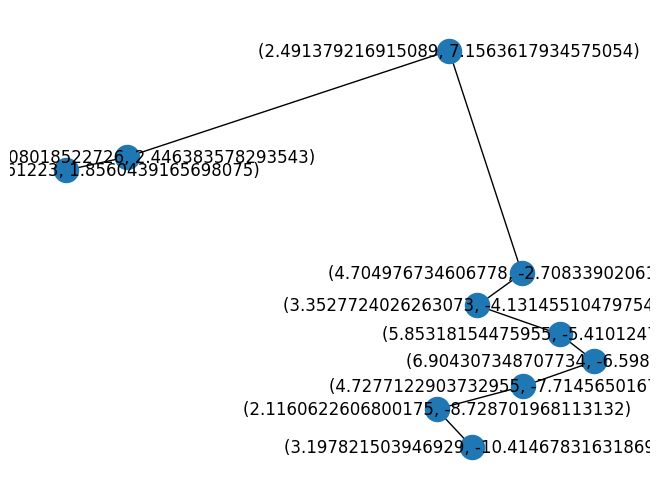

In [160]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming get_MST_edges_with_coordinates returns a list of edges
edges = get_MST_edges_with_coordinates(centroids_k)

# Create a graph and add the edges
G = nx.Graph()
G.add_edges_from(edges)

# Create a dictionary that maps nodes to their positions
pos = {node: node for node in G.nodes()}

# Draw the graph using the positions
nx.draw(G, pos, with_labels=True)
plt.show()

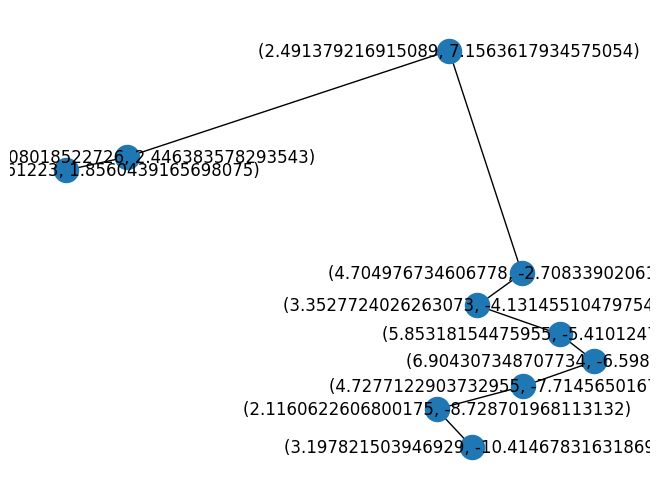

In [161]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming get_MST_edges_with_coordinates returns a list of edges
edges = get_MST_edges_with_coordinates(centroids_k)

# Create a graph and add the edges
G = nx.Graph()
G.add_edges_from(edges)

# Create a dictionary that maps nodes to their positions
pos = {node: node for node in G.nodes()}

# Draw the graph using the positions
nx.draw(G, pos, with_labels=True)
plt.show()

In [162]:
edge_centers = []
for edge in edges:
    x1, y1 = edge[0]
    x2, y2 = edge[1]
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    edge_centers.append((center_x, center_y))

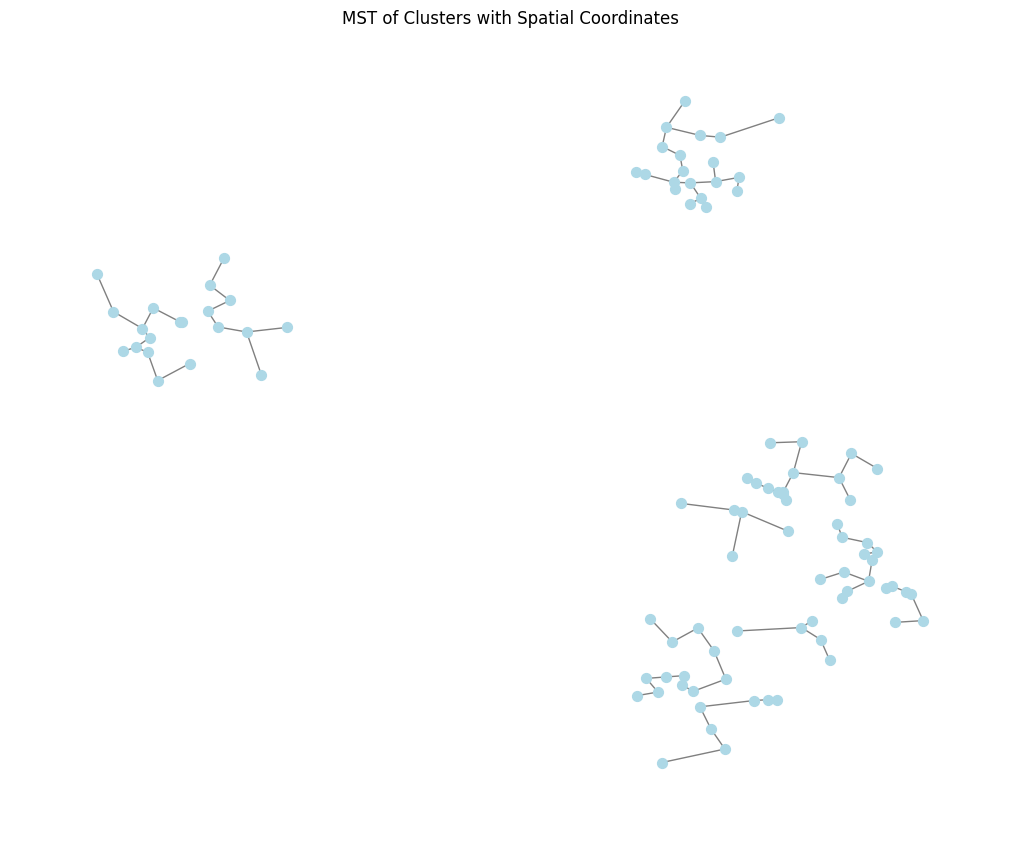

In [163]:
import networkx as nx

# Assuming clusters_mst_edges contains the MST edges for each cluster as calculated previously

# Create a new NetworkX graph
G = nx.Graph()

# Add edges from each cluster's MST to the graph
for mst_edges in clusters_mst_edges:
    G.add_edges_from(mst_edges)

pos = {node: node for node in G.nodes()}

# Plot the graph using the node positions
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
nx.draw(
    G,
    pos,
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    node_size=50,
    font_size=8,
)
plt.title("MST of Clusters with Spatial Coordinates")
plt.show()

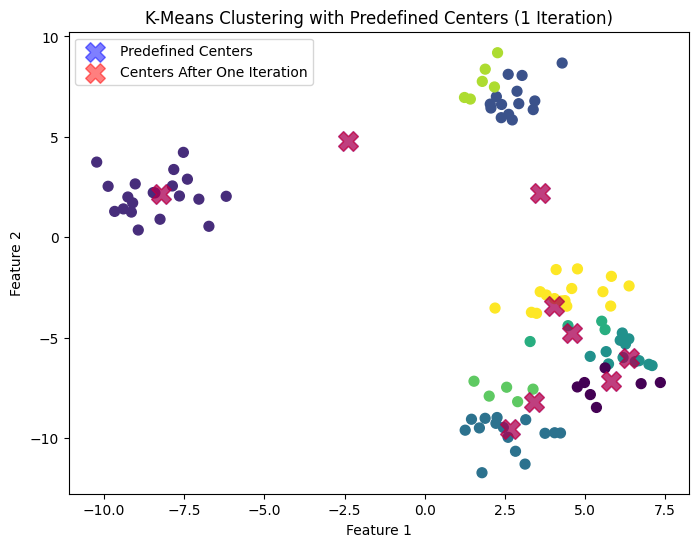

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that `predefined_centers` and `np_points` are defined correctly
predefined_centers = np.array(edge_centers)
np_points = np.array(points)
# Rest of the code remains the same
kmeans2 = KMeans(
    n_clusters=len(predefined_centers),
    init=predefined_centers,
    n_init=1,
    max_iter=1,
)
kmeans2.fit(predefined_centers)
y_k2 = kmeans2.predict(np_points)

# Visualize the results after one iteration
plt.figure(figsize=(8, 6))
plt.scatter(np_points[:, 0], np_points[:, 1], c=y_k2, s=50, cmap="viridis")

# Plot the predefined centers and the centers after one iteration
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="blue",
    s=200,
    alpha=0.5,
    marker="X",
    label="Predefined Centers",
)
plt.scatter(
    kmeans2.cluster_centers_[:, 0],
    kmeans2.cluster_centers_[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
    label="Centers After One Iteration",
)
plt.title("K-Means Clustering with Predefined Centers (1 Iteration)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [165]:
# Initialize a list for each cluster
clusters_2 = [[] for _ in range(k_clusters - 1)]

# Assign each point to its cluster
for point, cluster_index in zip(points, y_k2):
    clusters_2[cluster_index].append(point)

# Now `clusters` is a list of lists, where each inner list contains the points in that cluster
print(clusters_2)

[[(5.354878836297275, -8.477470469624867), (4.98172392059239, -7.236848911977998), (4.758588301601329, -7.456249880140782), (7.347424433697475, -7.236242267150388), (6.7480692445454435, -7.292330175757786), (5.164954417581045, -7.836397934658467), (5.625737585257989, -6.5080714748434705)], [(-9.025038788564238, 2.6544792999916775), (-8.46384492759638, 2.2211540687433384), (-7.823261159685169, 3.3724664971143437), (-8.251669049802409, 0.8952331563597276), (-9.104651432993146, 1.7113669339281654), (-7.398033496357955, 2.890165072479987), (-9.870249062271736, 2.5356170652219956), (-9.254939067666843, 2.00276270236689), (-7.5234696112548285, 4.225855447983743), (-9.394036260930346, 1.4101074560505071), (-7.0406248004334, 1.8940561223780437), (-9.145222198620482, 1.2513300836147327), (-9.665516698728, 1.285607341996092), (-8.410874112773582, 2.2063946617571437), (-7.866041394178835, 2.5531018250262574), (-6.188007520853317, 2.0375993658373983), (-6.727570238322885, 0.5443665483632878), (-10

In [166]:
clusters_2_mst_edges = []  # To store the MST edges of each cluster

for cluster in clusters_2:
    if len(cluster) > 1:  # Ensure there are at least two points to form an edge
        mst_edges = get_MST_edges_with_coordinates(cluster)
        mst_edges_tuples = [tuple(edge) for edge in mst_edges]
        clusters_2_mst_edges.append(mst_edges_tuples)
    else:
        clusters_2_mst_edges.append([])  # No edges in a cluster with a single point

# Print MST edges for each cluster
for i, mst_edges in enumerate(clusters_2_mst_edges):
    print(f"Cluster {i} MST Edges:")
    for edge in mst_edges:
        print(edge)

Cluster 0 MST Edges:
((4.758588301601329, -7.456249880140782), (4.98172392059239, -7.236848911977998))
((5.164954417581045, -7.836397934658467), (4.758588301601329, -7.456249880140782))
((6.7480692445454435, -7.292330175757786), (7.347424433697475, -7.236242267150388))
((5.625737585257989, -6.5080714748434705), (6.7480692445454435, -7.292330175757786))
((5.354878836297275, -8.477470469624867), (5.164954417581045, -7.836397934658467))
((4.98172392059239, -7.236848911977998), (5.625737585257989, -6.5080714748434705))
Cluster 1 MST Edges:
((-9.025038788564238, 2.6544792999916775), (-8.46384492759638, 2.2211540687433384))
((-7.398033496357955, 2.890165072479987), (-7.823261159685169, 3.3724664971143437))
((-8.930216543550591, 0.3579022532742133), (-8.251669049802409, 0.8952331563597276))
((-9.254939067666843, 2.00276270236689), (-9.104651432993146, 1.7113669339281654))
((-7.866041394178835, 2.5531018250262574), (-7.398033496357955, 2.890165072479987))
((-9.254939067666843, 2.00276270236689

In [175]:
clusters_2_mst_edges = []  # To store the MST edges of each cluster

for cluster in clusters_2:
    if len(cluster) > 1:  # Ensure there are at least two points to form an edge
        mst_edges = get_MST_edges_with_coordinates(cluster)
        mst_edges_tuples = [tuple(edge) for edge in mst_edges]
        clusters_2_mst_edges.append(mst_edges_tuples)
    else:
        clusters_2_mst_edges.append([])  # No edges in a cluster with a single point

# Print MST edges for each cluster
for i, mst_edges in enumerate(clusters_2_mst_edges):
    print(f"Cluster {i} MST Edges:")
    for edge in mst_edges:
        G.add_edge(edge[0], edge[1])
        print(edge)

Cluster 0 MST Edges:
((4.758588301601329, -7.456249880140782), (4.98172392059239, -7.236848911977998))
((5.164954417581045, -7.836397934658467), (4.758588301601329, -7.456249880140782))
((6.7480692445454435, -7.292330175757786), (7.347424433697475, -7.236242267150388))
((5.625737585257989, -6.5080714748434705), (6.7480692445454435, -7.292330175757786))
((5.354878836297275, -8.477470469624867), (5.164954417581045, -7.836397934658467))
((4.98172392059239, -7.236848911977998), (5.625737585257989, -6.5080714748434705))
Cluster 1 MST Edges:
((-9.025038788564238, 2.6544792999916775), (-8.46384492759638, 2.2211540687433384))
((-7.398033496357955, 2.890165072479987), (-7.823261159685169, 3.3724664971143437))
((-8.930216543550591, 0.3579022532742133), (-8.251669049802409, 0.8952331563597276))
((-9.254939067666843, 2.00276270236689), (-9.104651432993146, 1.7113669339281654))
((-7.866041394178835, 2.5531018250262574), (-7.398033496357955, 2.890165072479987))
((-9.254939067666843, 2.00276270236689

In [174]:
type(clusters_2_mst_edges[0])

list

Text(0.5, 1.0, 'MST of Cluster 2')

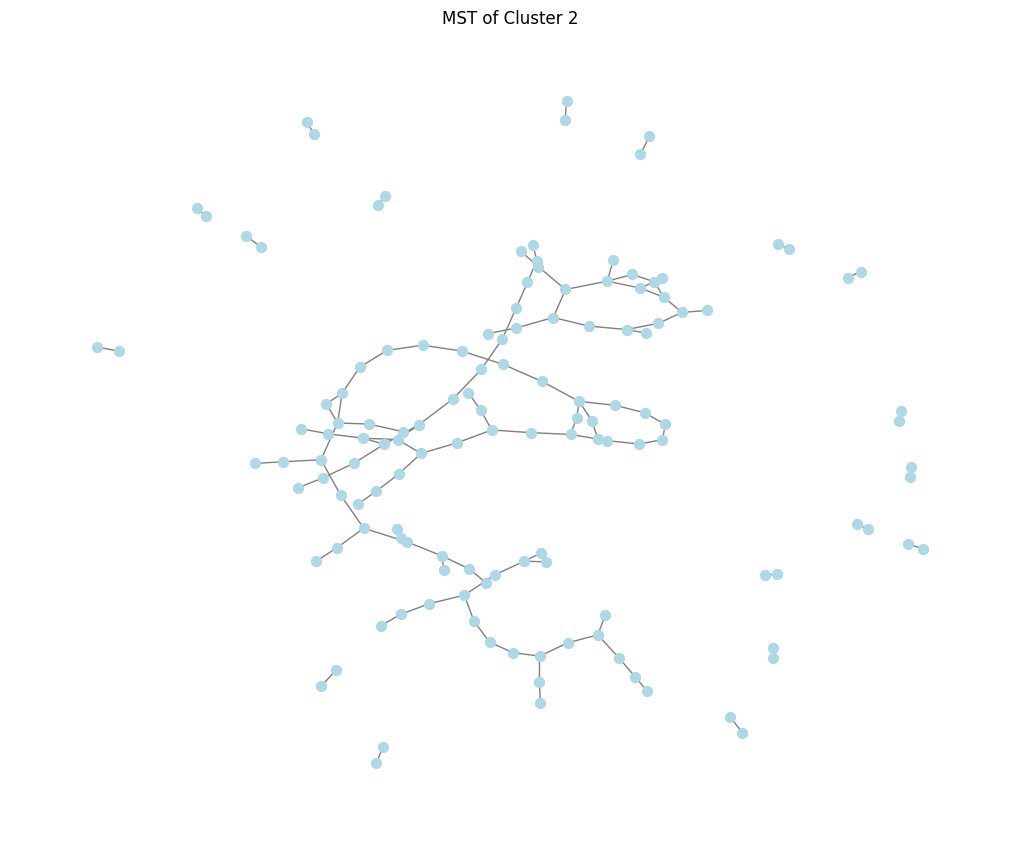

In [177]:
# clusters_2_mst_edges = [tuple(edge) for edge in clusters_2_mst_edges] 
# for mst_edges in clusters_2_mst_edges:
#     G.add_edges_from(mst_edges)

# pos = {node: node for node in G.nodes()}

# Plot the graph using the node positions
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
nx.draw(
    G,
    
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    node_size=50,
    font_size=8,
)
plt.title("MST of Cluster 2")

In [ ]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")

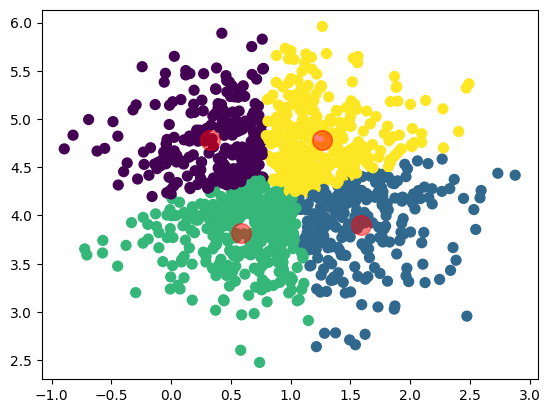

In [73]:


# Generate sample data
X, y_true = make_blobs(n_samples=1130, centers=1, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5)
plt.show()

In [74]:
type(centers)

numpy.ndarray

In [75]:
import numpy as np


def generate_new_centers_np(points, n_centers):
    new_centers = np.zeros((0, points.shape[1]))  # Initialize with no centers
    while new_centers.shape[0] < n_centers:
        # Randomly select two indices
        indices = np.random.choice(points.shape[0], 2, replace=False)
        # Calculate the mean of the two points
        new_center = points[indices].mean(axis=0)
        # Check if the new center is unique
        if not np.any(np.all(np.isclose(new_centers, new_center), axis=1)):
            # If unique, add it to new_centers
            new_centers = np.vstack((new_centers, new_center))
    return new_centers


# Generate 3 new centers
new_centers_np = generate_new_centers_np(centers, 6)
new_centers_np

array([[0.79210661, 4.78146696],
       [0.9561975 , 4.34472548],
       [0.92290142, 4.29558251],
       [0.45512448, 4.29945849],
       [1.08699231, 3.85884103],
       [1.42397445, 4.3408495 ]])

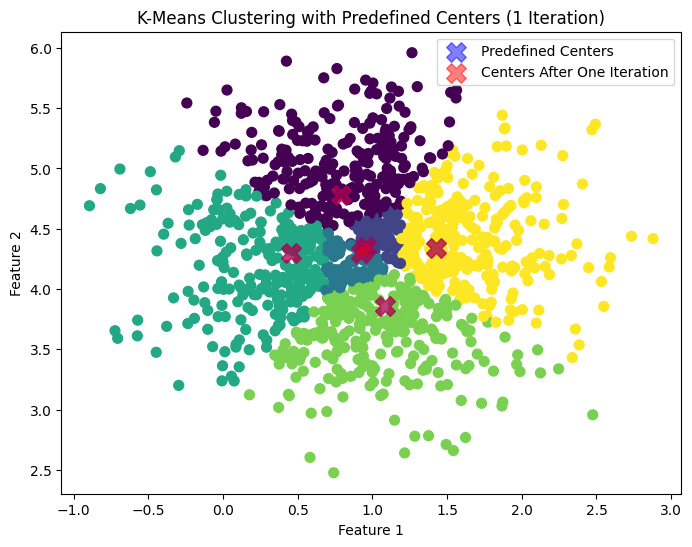

In [78]:
# Adjusted KMeans with max_iter set to 1 for only one iteration
predefined_centers = new_centers_np
kmeans_predefined_one_iter = KMeans(
    n_clusters=predefined_centers.shape[0], init=predefined_centers, n_init=1, max_iter=1
)
kmeans_predefined_one_iter.fit(predefined_centers)
y_kmeans_predefined_one_iter = kmeans_predefined_one_iter.predict(X)

# Visualize the results after one iteration
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_predefined_one_iter, s=50, cmap="viridis")

# Plot the predefined centers and the centers after one iteration
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="blue",
    s=200,
    alpha=0.5,
    marker="X",
    label="Predefined Centers",
)
plt.scatter(
    kmeans_predefined_one_iter.cluster_centers_[:, 0],
    kmeans_predefined_one_iter.cluster_centers_[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
    label="Centers After One Iteration",
)
plt.title("K-Means Clustering with Predefined Centers (1 Iteration)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [79]:
print(kmeans_predefined_one_iter.cluster_centers_)
print(predefined_centers)

[[0.79210661 4.78146696]
 [0.9561975  4.34472548]
 [0.92290142 4.29558251]
 [0.45512448 4.29945849]
 [1.08699231 3.85884103]
 [1.42397445 4.3408495 ]]
[[0.79210661 4.78146696]
 [0.9561975  4.34472548]
 [0.92290142 4.29558251]
 [0.45512448 4.29945849]
 [1.08699231 3.85884103]
 [1.42397445 4.3408495 ]]


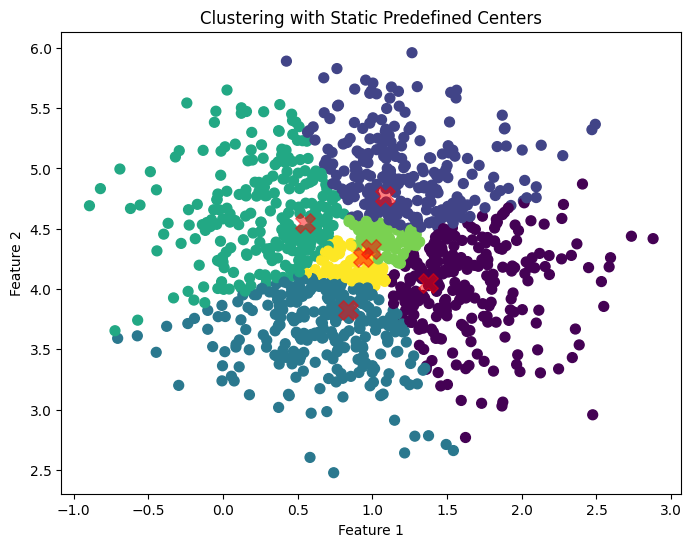

In [72]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

predefined_centers = new_centers_np
# Calculate distances from each point to each predefined center
distances = cdist(X, predefined_centers)

# Assign each point to the nearest center
closest_center_indices = np.argmin(distances, axis=1)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=closest_center_indices, s=50, cmap="viridis")

# Plot the predefined centers
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
)
plt.title("Clustering with Static Predefined Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

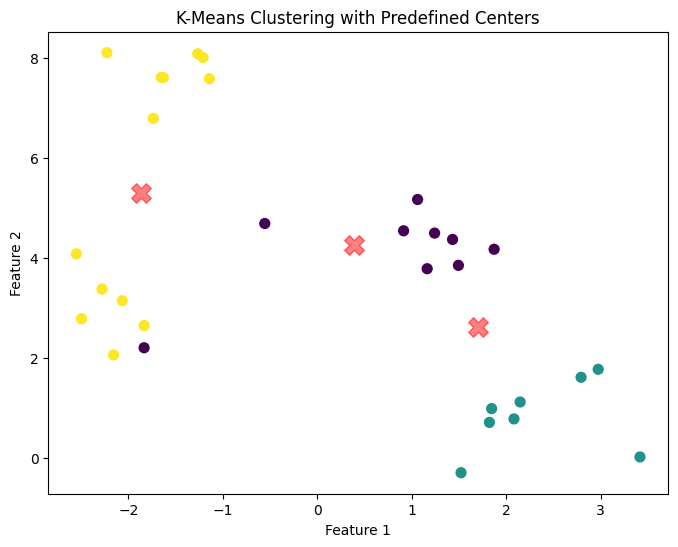

In [43]:
import numpy as np

# Predefined centers
predefined_centers =  new_centers_np

# Generate a dataset with these centers in mind


# Apply k-means clustering with predefined centers as initial centroids
kmeans_predefined = KMeans(n_clusters=3, init=predefined_centers, n_init=1)
kmeans_predefined.fit(X)
y_kmeans_predefined = kmeans_predefined.predict(X)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_predefined, s=50, cmap="viridis")

# Plot the predefined centers
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
)
plt.title("K-Means Clustering with Predefined Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [44]:
kmeans_predefined.cluster_centers_

array([[ 0.75504054,  4.14925046],
       [ 2.32605545,  0.84378376],
       [-1.86429348,  5.53754246]])

In [21]:
savefile = "mst_datatest.json"
to_plot = False
no_points = 10000
no_centres = 2

In [22]:
if no_points > 999:
    to_plot = False

In [82]:
X, Y = make_blobs(n_samples=no_points, centers=no_centres)
points = list(set([(x, y) for x, y in X]))
# points = list(set([(round(x, 1), round(y, 1)) for x, y in X]))
print(len(points))

10000


In [24]:
dcran_start_time = time.time()
i_neighbors_dict = {}
tree = KDTree()
G = nx.Graph()

In [25]:
def build(points):
    global cordmap, i_neighbors_dict, tree, G
    tree.root = tree.build(points)
    limit_dist = math.ceil(log(len(points)))

    G.add_nodes_from(points)
    for point in points:
        i_neighbors_dict[point] = i_neighbors(tree, point, limit_dist)
    print("max dis : " ,limit_dist )
    return tree, G

In [26]:
def dcran(points):
    global cordmap, i_neighbors_dict, tree, G
    tree, G = build(points)

    for k in range(math.ceil(log(len(points)))):
        components = list(nx.connected_components(G))
        if len(components) == 1:
            break
        for component in components:
            for pointi in component:
                eudis, pointj = i_neighbors_dict[pointi][k]
                if pointj in component:
                    continue

                G.add_edge(pointi, pointj, weight=eudis)
    print(len(list(nx.connected_components(G))))

In [27]:
dcran(points)

max dis :  10
1


In [28]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")


The closest point to the centroid in the component is [-5.48703021 -8.83187096]


In [29]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")

The closest point to the centroid in the component is [-5.48703021 -8.83187096]


In [30]:
core_points_x = sorted(enumerate(core_points), key=lambda x: x[1][0])
core_points_y = sorted(enumerate(core_points), key=lambda x: x[1][1])
tot_dis_x = 0
tot_dis_y = 0
for i in range(len(core_points_x)-1):
    tot_dis_x += distance.euclidean(core_points_x[i][1], core_points_x[i+1][1])
    tot_dis_y += distance.euclidean(core_points_y[i][1], core_points_y[i+1][1])

if tot_dis_x > tot_dis_y:
    core_points = core_points_y
else:
    core_points = core_points_x

In [31]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")

In [32]:
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time
print(dcran_elapsed_time)

1.1596739292144775


In [33]:
stmst_start_time = time.time()

Implement KNn from scratch

In [34]:



def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def create_distance_matrix(points):
    n = len(points)
    distance_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            distance = calculate_distance(points[i], points[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix


def primMST(graph):
    num_vertices = len(graph)
    key = [float("inf")] * num_vertices
    parent = [-1] * num_vertices
    mstSet = [False] * num_vertices
    key[0] = 0

    for cout in range(num_vertices):
        u = minKey(key, mstSet)
        mstSet[u] = True
        for v in range(num_vertices):
            if 0 < graph[u][v] < key[v] and mstSet[v] is False:
                key[v] = graph[u][v]
                parent[v] = u
    return parent


def minKey(key, mstSet):
    min = float("inf")
    min_index = -1
    for v in range(len(key)):
        if key[v] < min and not mstSet[v]:
            min, min_index = key[v], v
    return min_index


# Example list of points

# Create the distance matrix
distance_matrix = create_distance_matrix(points)

# Generate MST using Prim's algorithm
mst = primMST(distance_matrix)

# Print the edges in the MST


KeyboardInterrupt: 

In [ ]:
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time
print(stmst_elapsed_time)   

95.11501884460449


In [ ]:
stmst_elapsed_time/dcran_elapsed_time

47.198823239482195